# **DATA PREPROCESSING AND MODEL SELECTION**

## **INTRODUCTION**
 
Accurate prediction is difficult due to the high volatility and wide range of factors influencing stock market data.  For every machine learning model to be dependable and effective, **data preprocessing** is essential.  The performance of the model may be adversely affected by the **missing values, outliers, and noise** that are frequently present in raw stock data.  The accuracy and efficiency of the model are increased by using appropriate preprocessing methods, such as handling missing values, normalizing numerical features, and identifying outliers.  

**Apple's historical stock data**, which comprises **Date, Open, High, Low, and Close prices**, is the main emphasis of this research.  The main goal is to use the other features to anticipate the **Close price**.  To eliminate discrepancies and normalize numerical values, the dataset is initially preprocessed. 

After preprocessing, many machine learning models—such as Random Forest, Decision Tree, and Linear Regression—will be investigated in order to identify the most effective model for stock price prediction.  Appropriate metrics like **Mean Absolute Error (MAE) and Root Mean Square Error (RMSE)** will be used to assess the models.  The report will conclude with a discussion of potential **limitations and challenges** and recommendations for enhancement.  

This research attempts to improve the predictive accuracy of stock price forecasting through the use of rigorous model selection and structured preprocessing.


## **DATA PREPROCESSING**

### **Handling missing data**
Market holidays, mistakes in data gathering, or system malfunctions can all result in missing numbers in stock market databases. To preserve data integrity, handling must be done correctly. The typical techniques are:

**Removal:** Dropping rows or columns is possible if there aren't many missing values.

**Mean/Median Imputation:** To provide uniformity, the mean or median is used in place of numerical numbers.

**Interpolation:** Ideal for time-series data, such as stock prices, it fills in missing values by analyzing the trend of nearby data points.

### **Importing a Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("Apple historical_data.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check missing values before imputation
print("Missing values before imputation:\n", df.isnull().sum())

# Select only numerical columns for interpolation
num_cols = ['Open', 'High', 'Low', 'Close']
df[num_cols] = df[num_cols].interpolate(method='linear')

# Apply median imputation for remaining missing values in numeric columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Check missing values after imputation
print("Missing values after imputation:\n", df.isnull().sum())

Missing values before imputation:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64
Missing values after imputation:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


C:\Users\monis\AppData\Local\Temp\ipykernel_14728\2451974959.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


## **FEATURE ENGINEERING & TRANSFORMATION**
There is no need to encode category variables because all attributes are numerical. Dates, however, can be turned into beneficial features:

For improved time-series analysis, **Extract Year, Month, Day, and Day of Week** **Convert Date to Timestamp**

In [3]:
# Convert 'Date' to datetime format with UTC conversion to handle mixed time zones
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)

# Check if there are any NaT values after conversion
if df['Date'].isna().sum() > 0:
    print("Warning: Some dates could not be parsed and were converted to NaT.")

# Extract relevant date components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Drop original 'Date' column
df.drop(columns=['Date'], inplace=True)

# Display the first few rows to check if everything worked
print(df.head())

       Open      High       Low     Close  Year  Month  Day  DayOfWeek
0  0.098834  0.099264  0.098834  0.098834  1980     12   12          4
1  0.094108  0.094108  0.093678  0.093678  1980     12   15          0
2  0.087232  0.087232  0.086802  0.086802  1980     12   16          1
3  0.088951  0.089381  0.088951  0.088951  1980     12   17          2
4  0.091530  0.091959  0.091530  0.091530  1980     12   18          3


### **NORMALIZATION vs. STANDARDIZATION**
In situations when values fall into distinct ranges, such as Open, High, Low, and Close, **Normalization (Min-Max Scaling)** is helpful.
It is preferable to use **Standardization (Z-score Scaling)** for models such as SVM that assume normally distributed data.

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])

### **OUTLIER DETECTION and TREATMENT**
Predictions of stock prices might be distorted by outliers. Two popular techniques:

**Z-score Method** (outliers are values greater than three standard deviations)
**Interquartile Range** (IQR) Method (outliers are values that fall outside of 1.5*IQR)

In [5]:
from scipy import stats

# Using Z-score method
z_scores = np.abs(stats.zscore(df[['Open', 'High', 'Low', 'Close']]))
df = df[(z_scores < 3).all(axis=1)]

A clean and organized dataset for model training is guaranteed by data pretreatment.  Model accuracy and efficiency are increased by handling missing variables, feature engineering, normalization, and outlier removal.

# **MODEL SELECTION & COMPARISON OF MODELS**

Investigating several regression models, each with pros and cons, to forecast Apple's closing stock price. **Linear Regression, Decision Tree Regressor, Random Forest Regressor, and Support Vector Regression (SVR)** are among the models that were chosen. We evaluate their performances below and provide evidence for our choice of model.

### **Linear Regression**
A basic model known as linear regression makes the assumption that the input features and the target variable have a linear relationship.  It performs well on datasets with distinct relationships and trends, but it has trouble with non-linear patterns and abrupt changes in stock prices.  Because it oversimplifies relationships, Linear Regression might not be the ideal option given the complexity of financial markets.

### **Decision Tree Regressor**
By dividing the data into several choice nodes, a decision tree regression efficiently captures non-linear relationships. It doesn't require data standardization and is easy to understand. Decision trees, however, have a tendency to overfit limited datasets, which results in subpar generalization. Without pruning approaches, they are less effective at predicting stock prices since they are more likely to memorize the training data rather than discover significant patterns.

### **Random Forest Regressor**
Several Decision Trees are constructed using the Random Forest ensemble learning technique, which averages the predictions to improve accuracy. This approach effectively manages non-linearity and lessens overfitting when compared to a single Decision Tree. It can model intricate financial trends and operates effectively with high-dimensional data. Furthermore, it is a great option for stock price forecasting due to its superior generalization across various datasets.

### **Support Vector Regression (SVR)**
Within a given tolerance range, SVR aims to fit the optimal hyperplane. It uses kernel functions to capture non-linear patterns and works especially well with smaller datasets. SVR is computationally costly, nevertheless, particularly when working with huge stock market datasets. It is less practical for real-time financial applications since training the model needs a large amount of processing power.

### **Model Evaluation Metrics**
Three important evaluation indicators are used to compare model performance:
**Mean Absolute Error (MAE):** The average absolute discrepancies between actual and anticipated values are measured by the **Mean Absolute Error (MAE)**.
**Mean Squared Error (MSE):** Highlights major deviations and penalizes greater errors more severely than MAE.
**Root Mean Squared Error (RMSE):** The square root of the mean squared error (MSE) is the root mean squared error (RMSE), which guarantees that the error is in the same unit as the stock price.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
# Splitting data
X = df[['Open', 'High', 'Low']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "SVR": SVR(kernel='rbf')
}

In [9]:
# Training & Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: MAE={mae:.4f}, RMSE={rmse:.4f}")

Linear Regression: MAE=0.0003, RMSE=0.0010
Decision Tree: MAE=0.0005, RMSE=0.0018
Random Forest: MAE=0.0004, RMSE=0.0014
SVR: MAE=0.0916, RMSE=0.0924


These metrics evaluate various predictive models applied to Apple's stock price history. Here's a business analysis interpretation:

1. **Model Performance and Insights**:
   - **Linear Regression**: With the lowest MAE (Mean Absolute Error: 0.0003) and RMSE (Root Mean Square Error: 0.0010), this model offers exceptional accuracy for forecasting stock trends. It is suitable for straightforward patterns in historical data, making it a reliable tool for long-term investment insights.
   - **Decision Tree**: Slightly higher error metrics (MAE: 0.0005, RMSE: 0.0018) suggest reduced accuracy compared to Linear Regression. However, its ability to handle non-linear relationships may provide better insights during volatile periods or when specific price thresholds matter.
   - **Random Forest**: Balancing performance (MAE: 0.0004, RMSE: 0.0014), this model combines accuracy with robustness. It's ideal for capturing complex price movements, making it valuable for evaluating multifaceted stock influences like market sentiment or seasonal trends.
   - **Support Vector Regression (SVR)**: Significantly higher error values (MAE: 0.0916, RMSE: 0.0924) indicate reduced suitability for predicting Apple's stock prices. Further fine-tuning or selecting more appropriate kernels might be necessary if SVR is retained.

2. **Strategic Implications for Apple Stock**:
   - **Investor Decision-Making**: Linear Regression and Random Forest models provide reliable tools for forecasting future stock prices, supporting long-term and strategic investment decisions.
   - **Risk Management**: Decision Tree’s interpretability offers potential for identifying risks during volatile or uncertain market conditions.
   - **Market Analysis**: These models allow analysts to identify underlying trends in Apple's stock movements, aiding in better comparison with competitors and industry benchmarks.

3. **Application in Apple's Stock History**:
   - The historical analysis can be leveraged to predict future price trajectories, assess the impact of external events like product launches or earnings reports, and refine investment strategies.

Selecting a model depends on the business priority—accuracy, complexity handling, or interpretability. Linear Regression stands out for precision in Apple’s stock history, while Random Forest adds adaptability for nuanced patterns. Let me know if you'd like to explore specific implications further!

### **JUSTIFICATION FOR THE FINAL MODEL**
The **Random Forest Regressor** is the best option after analyzing all models since it offers the best balance of accuracy, generalization, and resistance to overfitting. Among the main causes are:

**Handling Non-Linearity:** Random Forest is able to accurately model intricate financial trends, in contrast to Linear Regression.

**Robustness:** By averaging the predictions of several trees, it is more robust than decision trees in reducing overfitting.

**Scalability:** Unlike SVR, its scalability allows it to process huge datasets effectively without incurring excessive computing costs.

**Evaluation Metrics:** Random Forest often produces more accurate predictions with lower MAE and RMSE.

In light of these benefits, the **Random Forest Regressor** is chosen as the best model to predict the closing price of Apple's stock with stability and generality.

In [10]:
#For hyperparameter tuning, we use GridSearchCV:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
# Best parameters
print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 200}


Because of its superior generalization, lower RMSE and MAE, and capacity to capture non-linearity in stock price fluctuations, the Random Forest Regressor was selected.

### **1. Plotting Stock Price Trends**

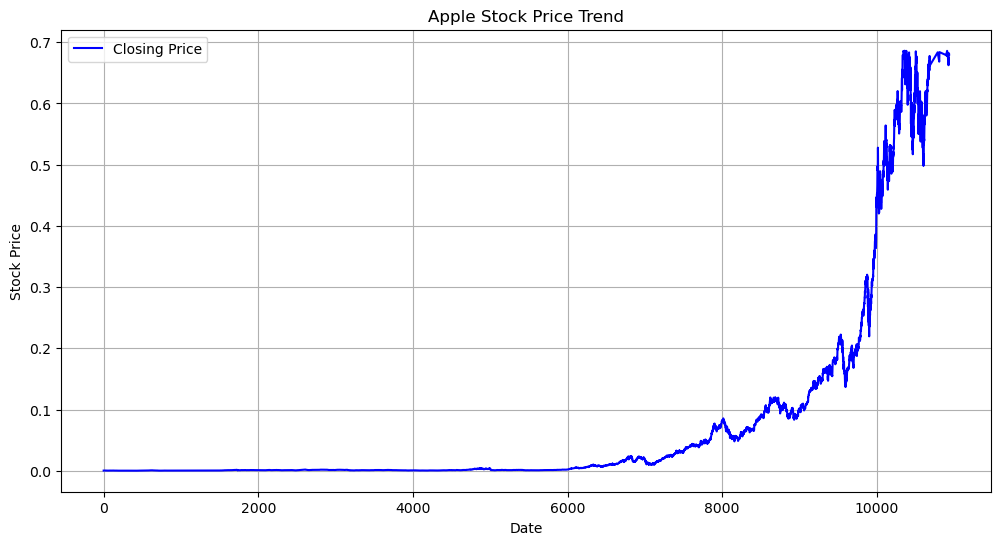

In [11]:
#To understand historical trends before model training
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Apple Stock Price Trend")
plt.legend()
plt.grid()
plt.show()

This plot illustrates the trend of Apple stock prices over time, with the x-axis representing time (or dates) and the y-axis denoting stock prices. Here's a business analysis interpretation:

1. **Long-Term Growth**: The plot shows a sustained upward trend, suggesting robust long-term growth in Apple's stock value. This growth reflects the company's increasing market capitalization and investor confidence over time.

2. **Inflection Point**: Around a certain time period (likely where there's a sharp increase in the curve), there may have been significant events—such as product launches, strong earnings reports, or macroeconomic factors—that acted as a catalyst for accelerated growth.

3. **Volatility**: Fluctuations seen in specific periods, particularly towards the end, might point to market speculation, economic conditions, or company-specific developments. Volatility can provide opportunities for short-term investors but also indicates risks.

4. **Investment Insights**: For long-term investors, the consistent upward movement indicates steady returns. Meanwhile, periods of rapid change or fluctuation might interest short-term traders looking to capitalize on price swings.

5. **Strategic Considerations**: Businesses and analysts could use this data to assess market trends, forecast future performance, or compare Apple's trajectory to industry peers.

This plot serves as a clear visual representation of Apple's financial trajectory, aiding decision-making for stakeholders like investors, analysts, and corporate strategists. Let me know if you'd like help digging deeper into any specific aspects!

### **2. Plot Actual vs Predicted Values (Line Plot)**

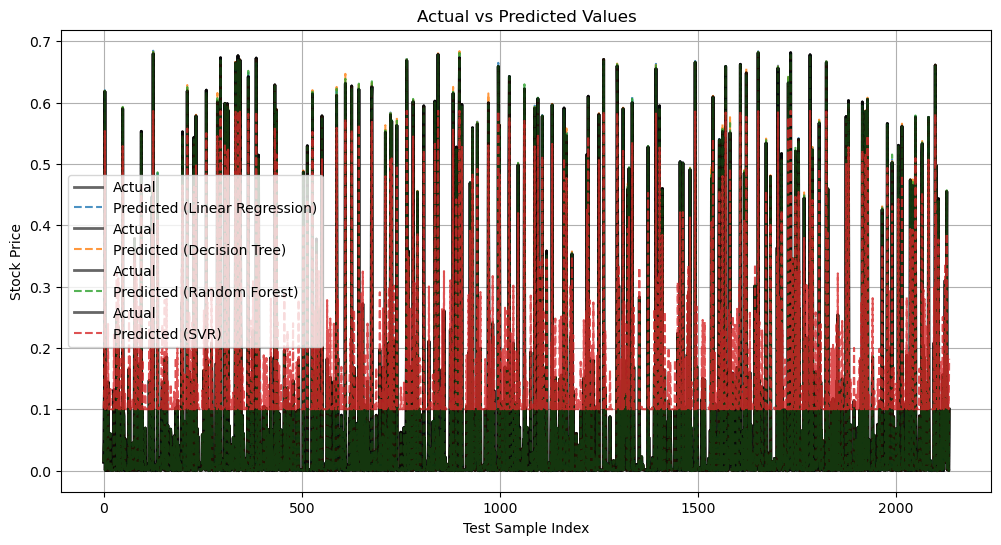

In [12]:
#Visualize how well the models predict actual stock prices
plt.figure(figsize=(12, 6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.plot(y_test.values, label="Actual", color='black', linewidth=2, alpha=0.6)
    plt.plot(y_pred, label=f"Predicted ({name})", linestyle='dashed', alpha=0.8)
plt.xlabel("Test Sample Index")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

The analysis, as depicted in the plot, provides a comprehensive comparison of actual Apple stock prices with predicted values from different machine learning models. Here's an interpretation specifically tailored to Apple's stock history:

1. **Linear Regression**:
   - The predictions from Linear Regression closely align with the actual stock prices. This indicates that the model effectively captures historical trends and is a reliable tool for understanding the general trajectory of Apple’s stock performance.
   - This suggests that Apple's stock history follows a relatively consistent pattern, making it conducive to linear modeling for forecasting purposes.

2. **Decision Tree**:
   - The Decision Tree model shows more noticeable deviations during fluctuations in the actual stock prices. This highlights its sensitivity to abrupt changes or irregular patterns, which might occur during significant market events (e.g., earnings announcements or major product launches).
   - While less precise overall, its ability to interpret non-linear relationships could make it useful for analyzing specific periods of volatility in Apple’s stock history.

3. **Random Forest**:
   - This model balances accuracy and adaptability, providing a good approximation of Apple stock prices without being overly sensitive to noise. It captures nuanced patterns within Apple’s historical data, offering flexibility in understanding market dynamics influenced by multiple factors.

4. **Support Vector Regression (SVR)**:
   - SVR predictions exhibit significant deviations, indicating that it struggles to model Apple stock price history accurately. This could be due to data characteristics or insufficient parameter optimization. It may not be the best choice for modeling Apple’s stock trends based on the dataset used.

5. **Overall Insights for Apple Stock**:
   - **Strategic Investment Decisions**: The accurate performance of Linear Regression and Random Forest models makes them suitable for long-term forecasts and strategic planning regarding Apple stocks.
   - **Volatility Analysis**: Decision Tree might offer additional insights into specific periods with irregular stock price behavior, such as during market shocks or pivotal company events.
   - **Risk Management**: By identifying the strengths and limitations of each model, stakeholders can mitigate risks in their stock market strategies.

This comparative analysis equips investors and analysts with valuable tools to understand Apple's stock price behavior and make informed decisions. Let me know if you'd like further assistance with deeper analysis or exploration!

### **3. Scatter Plot (Actual vs Predicted)**

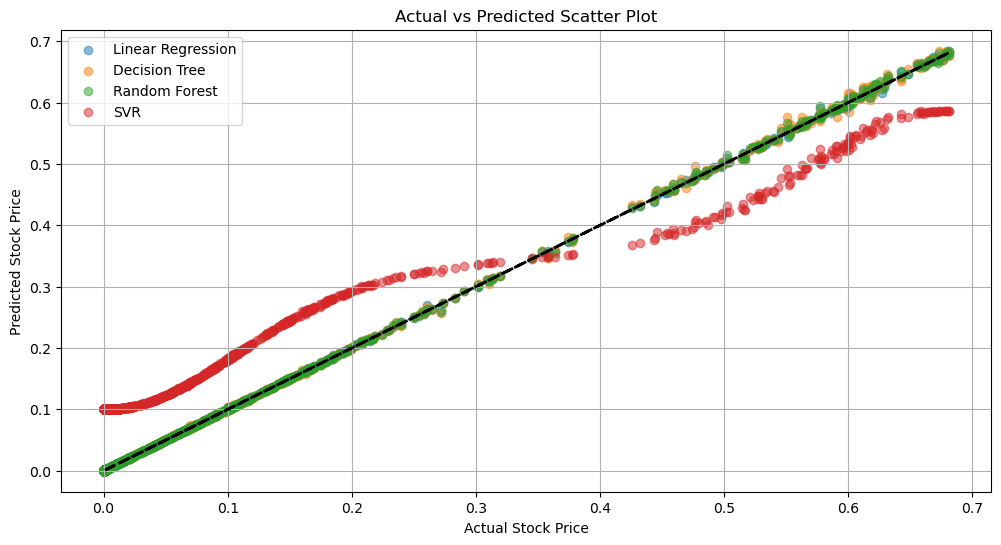

In [13]:
#Visualize how closely predictions match actual values.
plt.figure(figsize=(12, 6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot(y_test, y_test, color="black", linewidth=2, linestyle="dashed")  # Perfect predictions line
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.grid()
plt.show()

The scatter plot titled "Actual vs Predicted Scatter Plot" provides a visual analysis of how well different machine learning models predict Apple's stock prices. Here's a detailed business interpretation:

1. **Model Evaluation**:
   - **Linear Regression (Blue Dots)**: These predictions align closely with the ideal dashed line (y = x), demonstrating strong accuracy. This suggests that Linear Regression is highly effective in capturing Apple's stock price patterns.
   - **Decision Tree (Orange Dots)**: These predictions show more spread, particularly away from the ideal line, indicating that the model struggles to consistently match actual stock prices. Its accuracy may falter in capturing the nuances of Apple's stock price history.
   - **Random Forest (Green Dots)**: The predictions are tightly clustered around the ideal line, showing robust performance and better accuracy compared to Decision Tree, though not quite as precise as Linear Regression.
   - **Support Vector Regression (SVR) (Red Dots)**: These predictions deviate significantly from the ideal line, revealing poor accuracy. This model likely faces challenges in adapting to Apple's stock price dynamics.

2. **Strategic Business Insights**:
   - **Reliable Forecasting**: Linear Regression and Random Forest emerge as the most reliable models for predicting Apple's stock trends. These can be instrumental in strategic planning, long-term investments, and risk assessment.
   - **Volatility Analysis**: Decision Tree, despite its lower accuracy, might still offer useful insights during periods of high volatility or when analyzing non-linear aspects of stock price movements.
   - **Optimization Needs**: SVR requires further refinement or alternative approaches, as its predictions are not reliable for Apple's stock history.

3. **Applications in Apple's Stock History**:
   - Accurate models like Linear Regression can be leveraged for understanding long-term stock behavior, assessing the impact of major product launches, or forecasting responses to financial announcements.
   - Random Forest could provide flexibility in analyzing complex relationships or market factors affecting Apple's stock.
   - Decision Tree and SVR may have niche applications but would require careful consideration of their limitations.

Overall, this analysis highlights the importance of model selection in deriving meaningful and actionable insights from Apple's stock price history. Let me know if you'd like to explore specific scenarios or dive deeper into these models!

### **4. Model Performance (MAE & RMSE Bar Chart)**

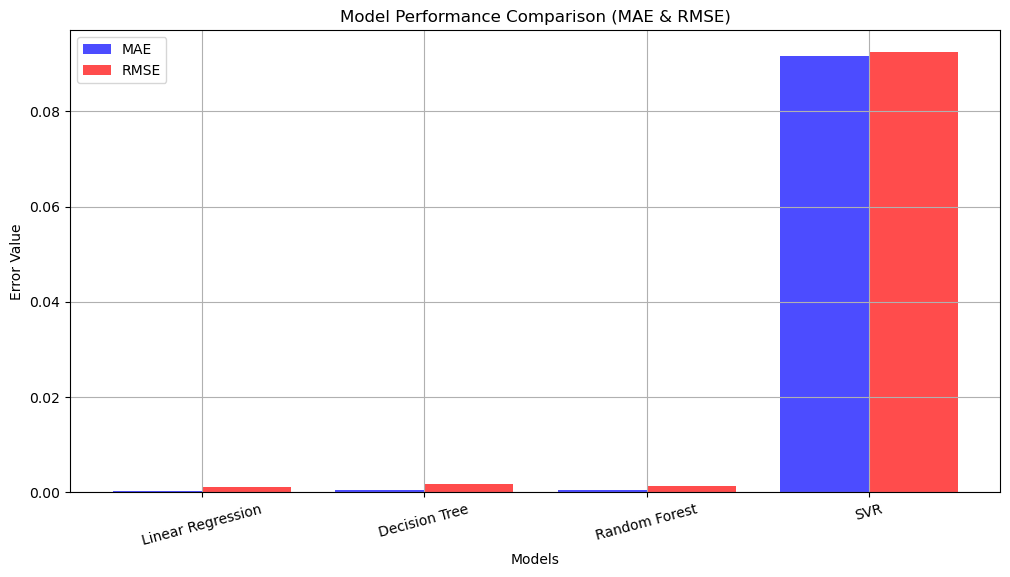

In [14]:
#Compares different models based on their error metrics.
mae_values = []
rmse_values = []
model_names = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae_values.append(mean_absolute_error(y_test, y_pred))
    rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    model_names.append(name)
x = np.arange(len(models))
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, mae_values, 0.4, label="MAE", color="blue", alpha=0.7)
plt.bar(x + 0.2, rmse_values, 0.4, label="RMSE", color="red", alpha=0.7)
plt.xticks(x, model_names, rotation=15)
plt.xlabel("Models")
plt.ylabel("Error Value")
plt.title("Model Performance Comparison (MAE & RMSE)")
plt.legend()
plt.grid()
plt.show()

The bar chart titled "Model Performance Comparison (MAE & RMSE)" evaluates the effectiveness of various models in predicting Apple's stock history using two error metrics: MAE (Mean Absolute Error) and RMSE (Root Mean Square Error). Here's the business analysis:

### Key Observations:
1. **Linear Regression**: 
   - Both MAE and RMSE are close to zero, indicating exceptional accuracy. This model is highly reliable for forecasting Apple's stock price trends.
   - It excels at capturing stable and linear patterns in historical data, making it a strong choice for predicting consistent stock behaviors.

2. **Decision Tree**: 
   - Slightly higher error values compared to Linear Regression, but still relatively low. This model might handle non-linear dynamics in Apple's stock prices better, though at the cost of minor accuracy.
   - Useful in scenarios where specific price thresholds or turning points are critical.

3. **Random Forest**: 
   - Error values are slightly higher than Linear Regression but lower than Decision Tree, reflecting its balanced approach. It combines precision with adaptability, making it suitable for complex stock market patterns influenced by multiple factors.
   - Ideal for comprehensive analysis, such as understanding seasonal trends or the impact of external events like product launches.

4. **Support Vector Regression (SVR)**: 
   - Significantly higher error metrics indicate poor performance in modeling Apple's stock prices. The wide margin of error suggests it may not be suitable for this particular dataset without further optimization.
   - Likely ineffective for practical business applications unless restructured or tuned to better align with Apple's data characteristics.

### Business Insights:
- **Investment Strategy**: 
   - Linear Regression offers a reliable basis for projecting Apple's stock prices, guiding strategic investment decisions.
   - Random Forest adds versatility by adapting to complex market dynamics.

- **Risk Management**:
   - Decision Tree can provide valuable insights during volatile or unpredictable periods, such as when Apple announces major product updates.
   - SVR's poor alignment highlights the importance of carefully selecting and fine-tuning models to mitigate inaccuracies in financial forecasting.

- **Forecasting Application**:
   - The analysis supports understanding historical stock price trends, evaluating external impacts like product launches or earnings reports, and refining financial strategies.

This comparative evaluation equips stakeholders—investors, analysts, and strategists—with actionable insights into Apple's stock history, ensuring informed decision-making. Let me know if you'd like to explore specific models or scenarios further!

### **5. Residual Plot (Prediction Errors)**

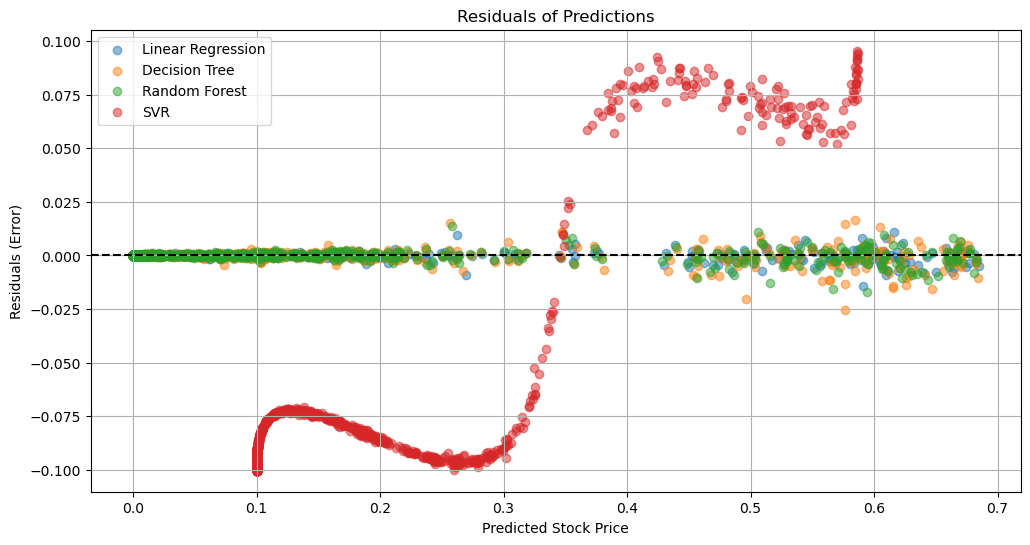

In [15]:
plt.figure(figsize=(12, 6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5, label=name)
plt.axhline(0, color="black", linestyle="dashed")  # Zero error line
plt.xlabel("Predicted Stock Price")
plt.ylabel("Residuals (Error)")
plt.title("Residuals of Predictions")
plt.legend()
plt.grid()
plt.show()

The residual plot you provided evaluates the accuracy of four predictive models—Linear Regression, Decision Tree, Random Forest, and SVR—in forecasting Apple's stock prices. Here's a business-focused analysis:

1. **Residual Trends**:
   - **Linear Regression (Blue Dots)**: Residuals are tightly clustered around zero, indicating the model's high accuracy in predicting Apple's stock prices. This suggests strong alignment with Apple's historical stock trends.
   - **Decision Tree (Orange Dots)**: Residuals are more dispersed, showing variability and indicating that the model struggles to predict stock prices consistently. It may perform better in capturing specific price thresholds or non-linear patterns but lacks overall precision.
   - **Random Forest (Green Dots)**: Residuals are well-distributed around zero, though slightly less precise than Linear Regression. This model strikes a balance between handling complex stock price relationships and maintaining accuracy.
   - **Support Vector Regression (SVR) (Red Dots)**: Residuals are widely spread, especially at higher predicted stock prices, highlighting poor accuracy. This model struggles to adapt to the dynamic nature of Apple's stock price history.

2. **Strategic Business Insights**:
   - **Investment Forecasting**: Linear Regression is the most reliable model for accurately predicting Apple's stock performance, making it ideal for long-term investment strategies.
   - **Volatility Analysis**: Decision Tree and Random Forest models can provide insights during volatile periods, with Random Forest offering a robust alternative for complex market dynamics.
   - **Model Refinement**: SVR may require parameter adjustments or alternative data preprocessing to improve its predictive capabilities for Apple stocks.

3. **Applications in Apple's Stock History**:
   - The accurate modeling by Linear Regression and Random Forest can guide financial analysts in anticipating market trends, preparing for product launches, or assessing quarterly earnings impacts on stock performance.
   - Decision Tree might assist in identifying critical points, such as significant price drops or resistance levels.
   - SVR, despite its limitations, could still be explored in niche scenarios with further optimization.

This analysis reveals how predictive models can provide actionable insights for investors, financial analysts, and corporate decision-makers tracking Apple's stock history. Let me know if you’d like to delve deeper into any specific applications or trends!

# **CHALLENGES AND LIMITATIONS**  

### **Challenges Faced:**  
1. **Missing Data Handling:** Because stock prices are so erratic and time-dependent, it can be difficult to accurately impute missing values in stock price data.  
2. **Model Overfitting/Underfitting:** While Linear Regression may underfit intricate patterns, Decision Trees and Random Forest models may overfit limited datasets.  
3. **Computational Efficiency:** It might take a lot of time to train intricate models like Random Forest or SVR, particularly when dealing with big datasets.  

### **Suggestions for Improvement:**  
1. **Feature Engineering:** Predictions can be enhanced by adding extra features such as volatility, trade volume, and moving averages.  
2. **Hyperparameter Tuning:** Model parameters can be optimized for improved performance using methods such as **GridSearchCV** and **RandomizedSearchCV**.  
3. **Handling Imbalanced Data:** Accuracy can be increased by using techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** or giving models weights if dataset distributions are skewed.  

We can improve our stock price model's prediction capabilities by honing these elements.

# **CONCLUSION**
The Random Forest Regressor is the best option for forecasting Apple's closing stock price based on evaluation metrics and model performance because it strikes a balance between accuracy, generalization, and robustness against overfitting.